In [52]:
import pandas as pd
from math import log
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

covidCases = pd.read_csv(url).drop(columns=['fips']).set_index(['state','county','date']).sort_index()
covidCases.head

In [49]:
def getDeathRate(deaths, cases): 
    if cases <= 0: return np.NaN 
    else: return deaths / cases

crudeDeathRate = covidCases.apply(lambda row: getDeathRate(row.deaths,row.cases), axis = 1)

pctChanges = covidCases.pct_change(1)

def getDoublingTimeFromPctChange(pctChange): 
    if pctChange <= 0: return np.NaN
    if pctChange == np.Inf: return np.NaN
    else:  return log(2) / log(1+pctChange)

doublingTimes = pctChanges.applymap(getDoublingTimeFromPctChange)

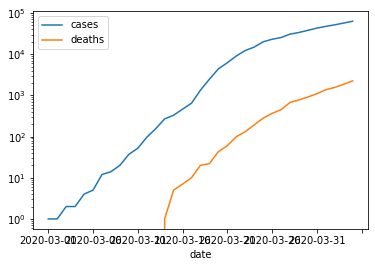

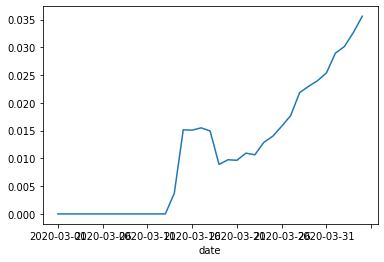

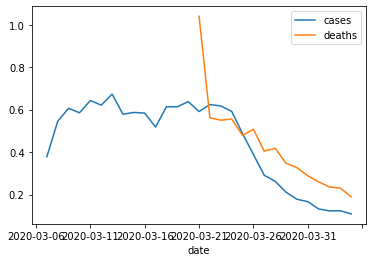

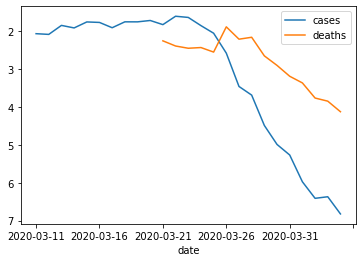

In [58]:
location = ('New York','New York City')
covidCases.loc[location].plot(logy=True)
crudeDeathRate.loc[location].plot(ax=plt.subplots()[1])
pctChanges.loc[location].rolling(7).mean().plot()
doublingTimes.loc[location].rolling(7).mean().plot().invert_yaxis()